Swoyam Thapa Magar

Uni ID: 2408839

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

Exploratory Data Analysis and Data Understanding

In [49]:
df= pd.read_csv("/content/drive/MyDrive/AI coursework/coffee_shop_revenue.csv");
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [50]:
# Dataset description
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# List of attributes (columns)
columns = df.columns.tolist()
print("\nList of Attributes (Columns):")
print(columns)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None

Summary Statistics:
       Number_of_Customers_Per_Day  Average_Order_Value  \
count                  2000.000000          2000.000000   
mean                    274.296000             6.261215   
std                     129.441933             2.175832   
min                      50.000000  

Data Cleaning

In [51]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Missing Values:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

Number of Duplicate Rows: 0


 Exploring the Data through Visualizations

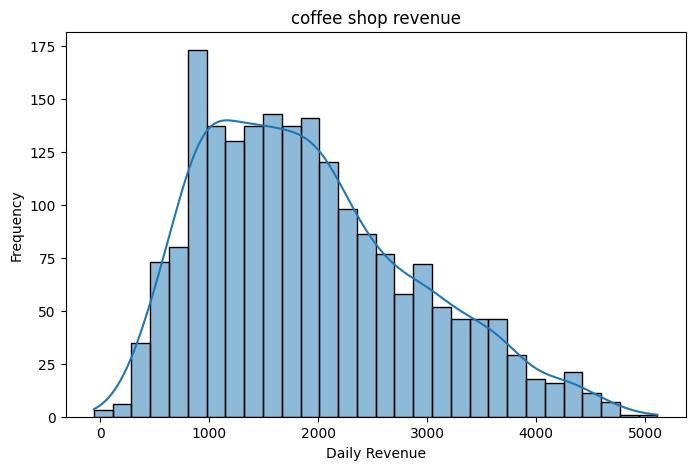

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Revenue'], kde=True, bins=30)
plt.title("coffee shop revenue")
plt.xlabel("Daily Revenue")
plt.ylabel("Frequency")
plt.show()

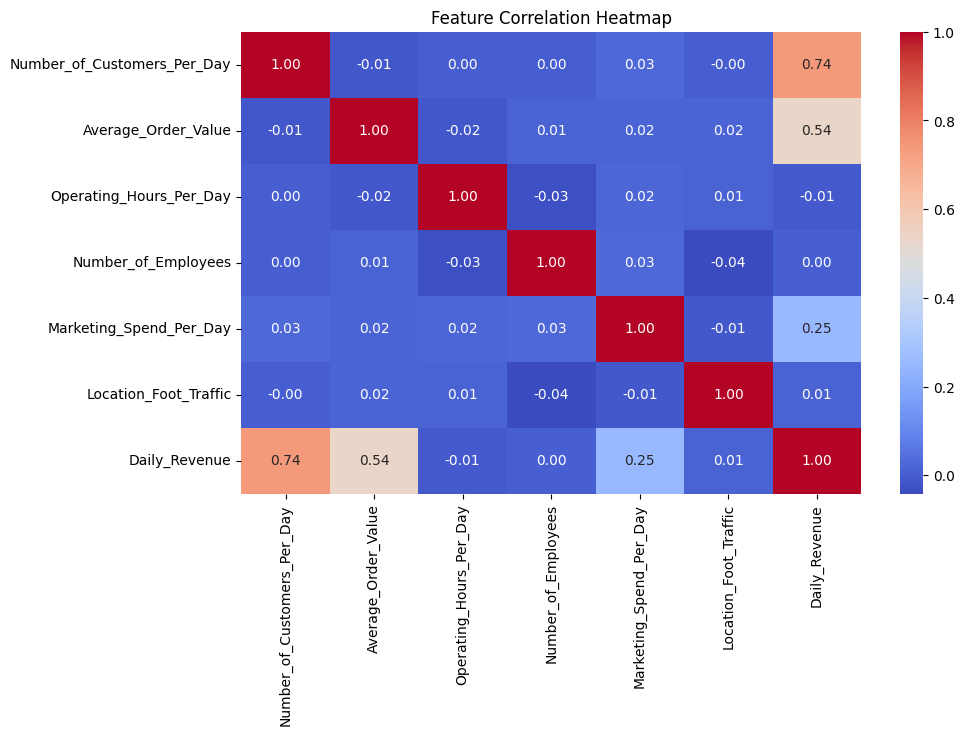

In [53]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
df = df.select_dtypes(include=np.number)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

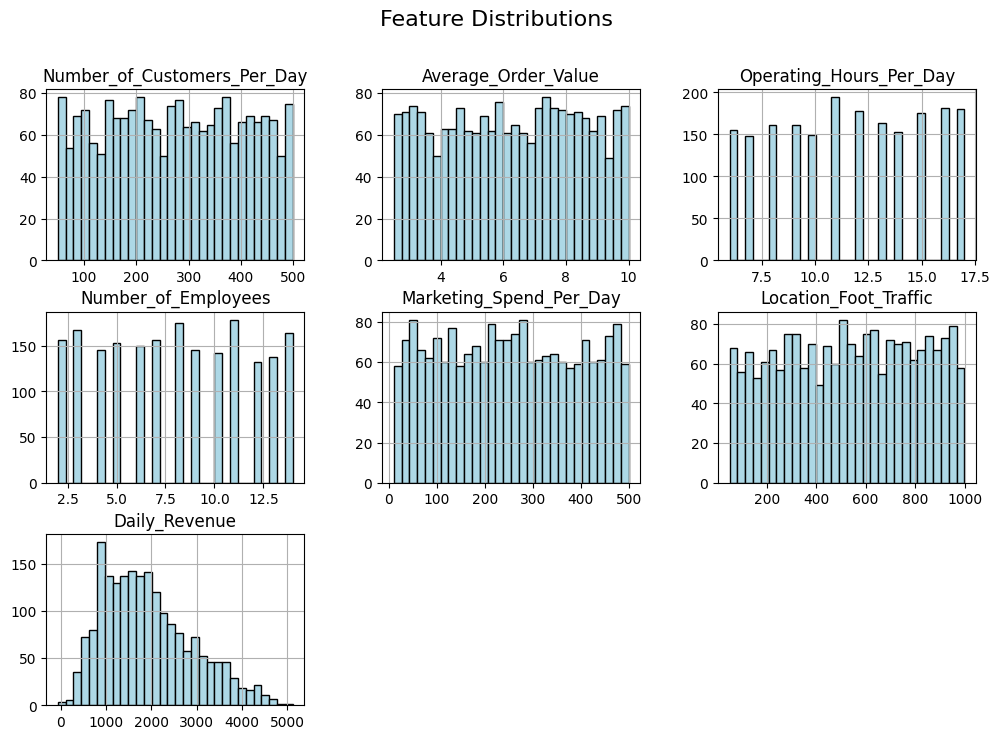

In [54]:
# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

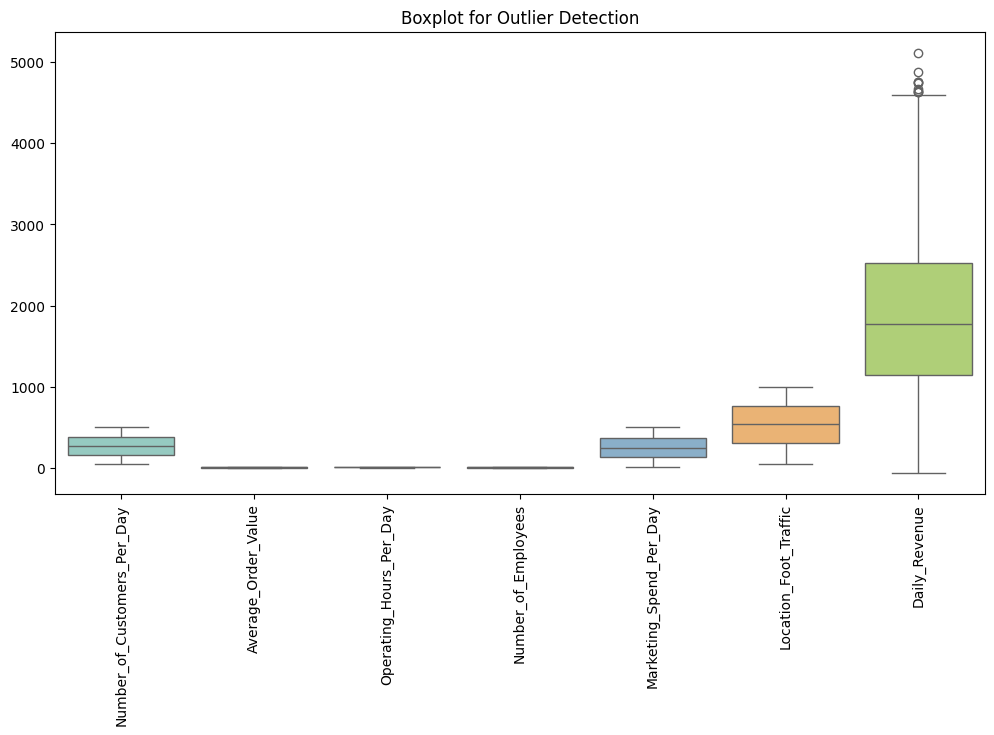

In [55]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

Build a Model from Scratch

In [56]:
def cost_function(X, Y, W):
    """Computes Mean Squared Error (MSE)"""
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2) / (2 * m)
    return J

def gradient_descent(X, Y, W, alpha, iterations):
    """Performs gradient descent to learn W"""
    cost_history = np.zeros(iterations)
    m = len(Y)

    for iteration in range(iterations):
        Y_pred = X.dot(W)
        loss = Y_pred - Y
        dw = X.T.dot(loss) / m
        W = W - alpha * dw  # Update W
        cost_history[iteration] = cost_function(X, Y, W)

    return W, cost_history

Splliting and Scaling the features

In [57]:

x = df.drop(columns=['Daily_Revenue'])
y = df['Daily_Revenue']

# Spliting the dataset into 80% training data and 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing weights
W = np.zeros(X_train.shape[1])

alpha = 0.01
# Trainin the model using gradient descent
new_weights, cost_history = gradient_descent(X_train, Y_train, W, alpha, 1000)
print(new_weights)
print(cost_history[-1])

# Makein predictions on the test set
Y_pred = X_test.dot(new_weights)

inital_cost = cost_function(x, y, W)
print(inital_cost)

[722.12466813 533.00947809   0.90592786  -6.58179039 218.90773622
   4.78028637]
1896471.036837036
2314317.0378573504


In [58]:
# Evaluating model
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(Y_test, Y_pred)
print(f"R-squared Score (R²): {r2:.4f}")

Mean Squared Error: 3838087.3502018
Root Mean Squared Error (RMSE): 1959.1037109356412
R-squared Score (R²): -3.1077


In [59]:
X = df.drop(columns=['Daily_Revenue'])
y = df['Daily_Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Build a Primary Model

In [60]:
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Training models
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Evaluating models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R-squared Score: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Decision Tree Regression Performance:
Mean Squared Error: 109161.6229
Mean Absolute Error: 268.7902
R-squared Score: 0.8832

Random Forest Performance:
Mean Squared Error: 47670.6932
Mean Absolute Error: 175.7146
R-squared Score: 0.9490



Hyperparameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)
print(f"Best R2 Score: {grid_search.best_score_:.4f}")


Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Best R2 Score: 0.9447


In [75]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree Regressor:")
print(grid_search_dt.best_params_)
print(f"Best R2 Score: {grid_search_dt.best_score_:.4f}")

Best Hyperparameters for Decision Tree Regressor:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R2 Score: 0.9058


Feature selection

In [61]:
from sklearn.feature_selection import SelectFromModel

# Initializing models
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

# Fiting Random Forest Regressor
rf_model.fit(X_train, y_train)
# Fiting Decision Tree Regressor
dt_model.fit(X_train, y_train)

# SelectFromModel for Random Forest
rf_selector = SelectFromModel(rf_model, threshold="mean", max_features=6)
X_selected_rf = rf_selector.transform(X_train)

# SelectFromModel for Decision Tree
dt_selector = SelectFromModel(dt_model, threshold="mean", max_features=6)
X_selected_dt = dt_selector.transform(X_train)

print("Selected features from Random Forest (indices):", rf_selector.get_support())
print("Selected features from Decision Tree (indices):", dt_selector.get_support())

# Geting the selected feature names
selected_rf_features = x.columns[rf_selector.get_support()]
selected_dt_features = x.columns[dt_selector.get_support()]

print("Selected features from Random Forest:", selected_rf_features)
print("Selected features from Decision Tree:", selected_dt_features)

Selected features from Random Forest (indices): [ True  True False False False False]
Selected features from Decision Tree (indices): [ True  True False False False False]
Selected features from Random Forest: Index(['Number_of_Customers_Per_Day', 'Average_Order_Value'], dtype='object')
Selected features from Decision Tree: Index(['Number_of_Customers_Per_Day', 'Average_Order_Value'], dtype='object')


<ipython-input-62-0a257af6c251>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='Blues_d')


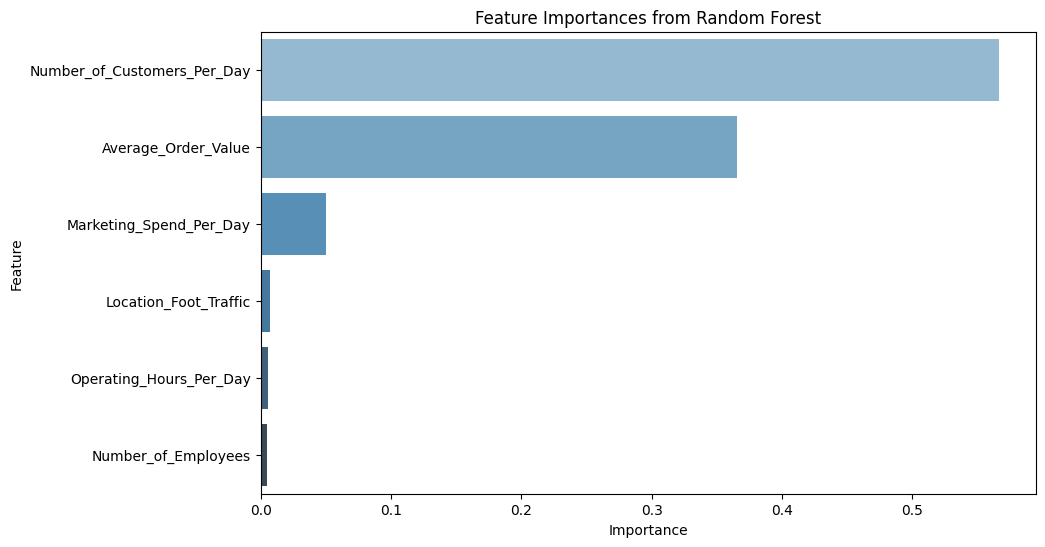

<ipython-input-62-0a257af6c251>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance_df, palette='Greens_d')


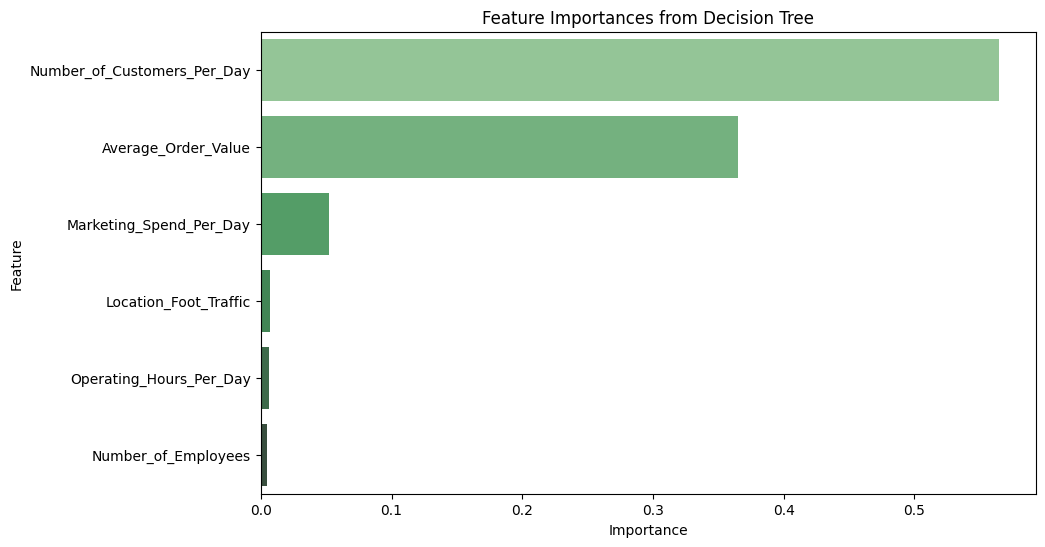

In [62]:
all_features = X.columns

rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_

# Createing DataFrames for all feature importances
rf_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf_importances
}).sort_values(by="Importance", ascending=False)

dt_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': dt_importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='Blues_d')
plt.title('Feature Importances from Random Forest')
plt.show()

# Plot the feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df, palette='Greens_d')
plt.title('Feature Importances from Decision Tree')
plt.show()

Final model

In [79]:
# Assuming x_train_scaled_df and x_test_scaled_df are DataFrames with scaled features
x_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
x_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)
# Select the important features
selected_features_rf = ['Number_of_Customers_Per_Day', 'Average_Order_Value']

# Subset the dataset with selected features
x_train_rf = x_train_scaled_df[selected_features_rf]
x_test_rf = x_test_scaled_df[selected_features_rf]

# Rebuilding Random Forest Regressor model with optimal hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=150, max_depth=None, min_samples_split=10)
rf_regressor.fit(x_train_rf, y_train)

# Predicting with the trained model
y_pred_rf = rf_regressor.predict(x_test_rf)

# Evaluating Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R^2 Score: {r2_rf:.4f}")



Random Forest Regressor Evaluation:
Mean Absolute Error: 252.1193
Mean Squared Error: 95254.1291
R^2 Score: 0.8981


In [74]:
# Assuming x_train_scaled_df and x_test_scaled_df are DataFrames with scaled features
x_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
x_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)
# Select the important features
selected_features_rf = ['Number_of_Customers_Per_Day', 'Average_Order_Value']

# Subset the dataset with selected features
x_train_tree = x_train_scaled_df[selected_features_rf]
x_test_tree = x_test_scaled_df[selected_features_rf]

# Rebuilding Decision Tree Regressor model with optimal hyperparameters
tree_regressor = DecisionTreeRegressor( max_depth=10, min_samples_split=10, min_samples_leaf= 4, random_state=42)
tree_regressor.fit(x_train_tree, y_train)

# Predicting with the trained model
y_pred_tree = tree_regressor.predict(x_test_tree)

# Evaluating Decision Tree Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nDecision Tree Regressor Evaluation:")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R^2 Score: {r2_rf:.4f}")



Decision Tree Regressor Evaluation:
Mean Absolute Error: 252.7702
Mean Squared Error: 96782.4980
R^2 Score: 0.8964


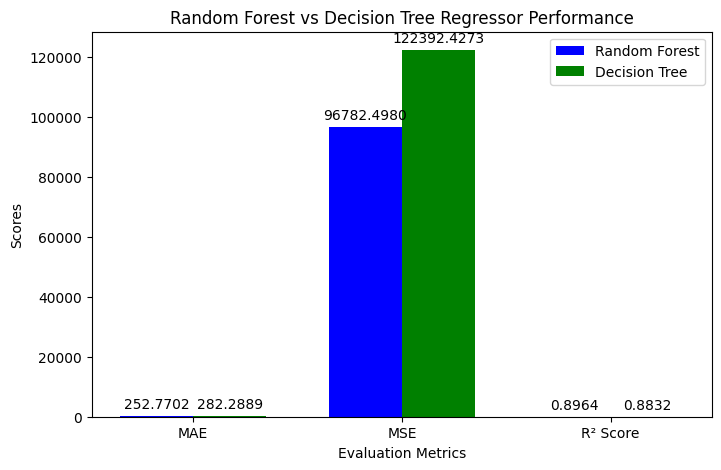


Model with lowest MAE (better accuracy): Random Forest
Model with lowest MSE (less error): Random Forest
Model with highest R² Score (better variance explanation): Random Forest


In [44]:
# Evaluating Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluating Decision Tree Regressor
mae_dt = mean_absolute_error(y_test, y_pred_tree)
mse_dt = mean_squared_error(y_test, y_pred_tree)
r2_dt = r2_score(y_test, y_pred_dt)

# Bar chart comparison
metrics = ["MAE", "MSE", "R² Score"]
rf_scores = [mae_rf, mse_rf, r2_rf]
dt_scores = [mae_dt, mse_dt, r2_dt]

x = np.arange(len(metrics))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - bar_width/2, rf_scores, bar_width, label="Random Forest", color="blue")
bars2 = ax.bar(x + bar_width/2, dt_scores, bar_width, label="Decision Tree", color="green")

# Labels and title
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Scores")
ax.set_title("Random Forest vs Decision Tree Regressor Performance")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show plot
plt.show()

# Determine which model performed better
better_model_mae = "Random Forest" if mae_rf < mae_dt else "Decision Tree"
better_model_mse = "Random Forest" if mse_rf < mse_dt else "Decision Tree"
better_model_r2 = "Random Forest" if r2_rf > r2_dt else "Decision Tree"

print(f"\nModel with lowest MAE (better accuracy): {better_model_mae}")
print(f"Model with lowest MSE (less error): {better_model_mse}")
print(f"Model with highest R² Score (better variance explanation): {better_model_r2}")